In [7]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use('seaborn')

In [8]:
# Load the dataset
def load_data(file_path="C:\\Users\\xashh\\Downloads\TCS_stock_history.csv"):
    try:
        data = pd.read_csv(file_path)
        data['Date'] = pd.to_datetime(data['Date'])
        data.sort_values(by='Date', inplace=True)
        print("Data loaded successfully!")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load data (replace 'TCS_stock_data.csv' with your file path)
data = load_data()
if data is not None:
    print(data.head())
  

Data loaded successfully!
        Date       Open       High        Low      Close  Volume  Dividends  \
0 2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1 2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2 2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3 2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4 2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [9]:
# Data preprocessing and cleaning
def preprocess_data(data):
    # Check for null values
    print("Null values:\n", data.isnull().sum())
    
    # Convert columns to numeric
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Forward fill NaN values
    data.fillna(method='ffill', inplace=True)
    
    # Remove outliers using IQR method for Close price
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]
    
    return data

# Preprocess data
data = preprocess_data(data)
print("Preprocessed data:\n", data.head())

Null values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Preprocessed data:
         Date       Open       High        Low      Close  Volume  Dividends  \
0 2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1 2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2 2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3 2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4 2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


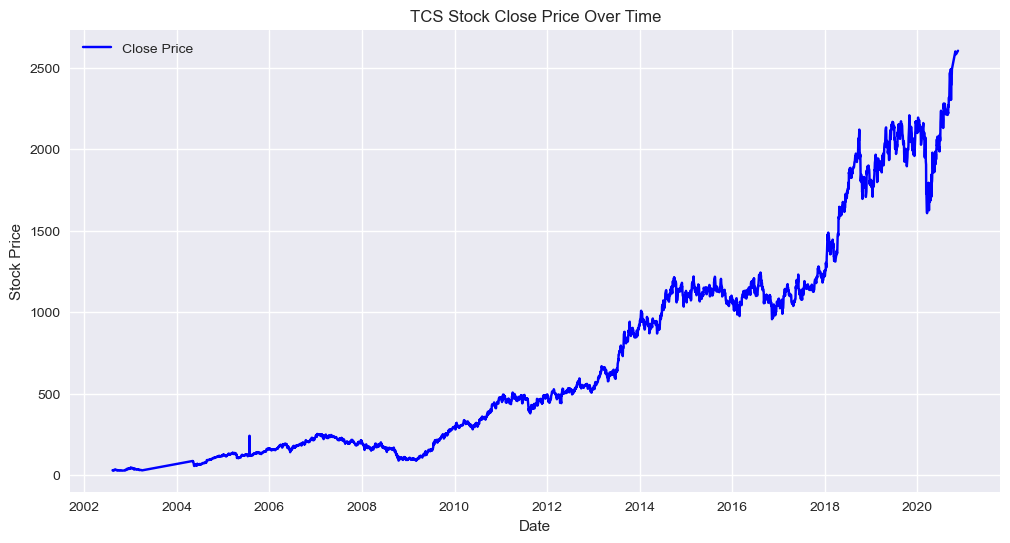

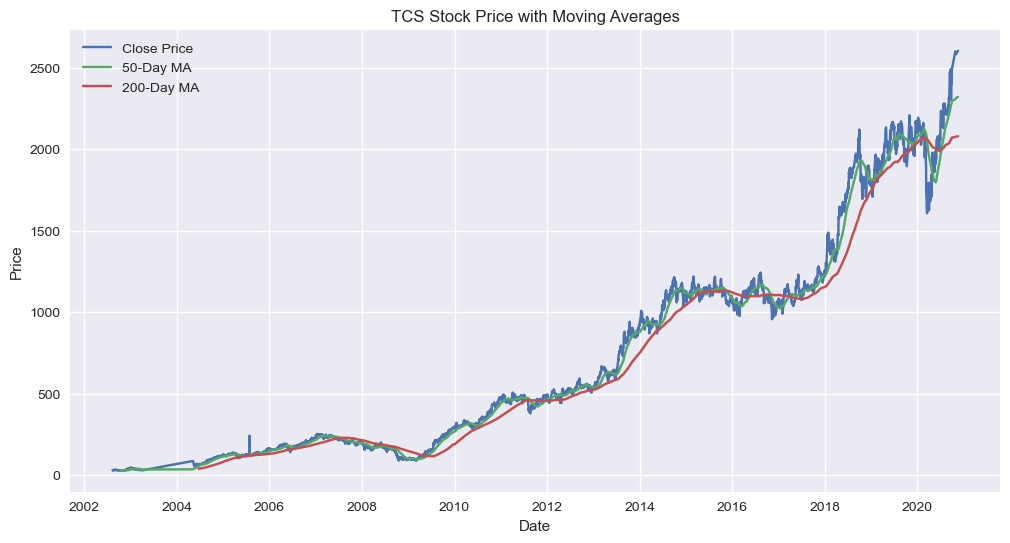

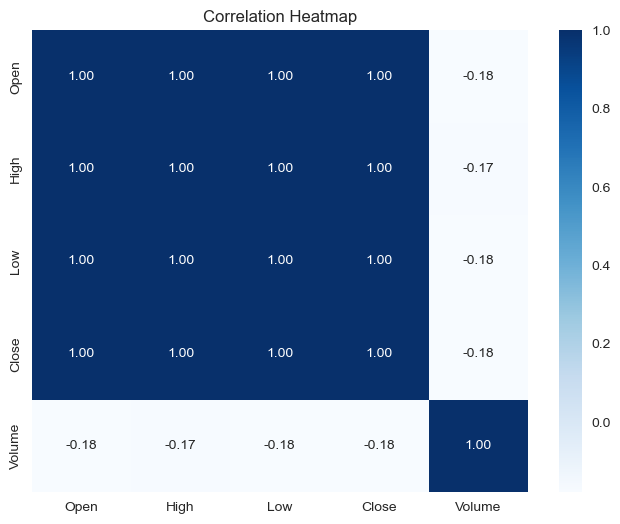

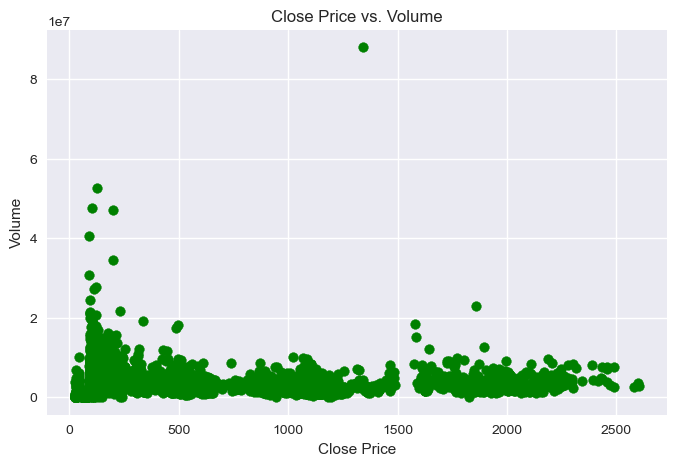

In [10]:
# Exploratory Data Analysis
def perform_eda(data):
    # Plot Close price over time
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('TCS Stock Close Price Over Time')
    plt.legend()
    plt.show()
    
    # Calculate and plot moving averages
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['MA50'], label='50-Day MA')
    plt.plot(data['Date'], data['MA200'], label='200-Day MA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('TCS Stock Price with Moving Averages')
    plt.legend()
    plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='Blues', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
    
    # Volume vs. Close Price
    plt.figure(figsize=(8, 5))
    plt.scatter(data['Close'], data['Volume'], color='green')
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.title('Close Price vs. Volume')
    plt.show()

# Perform EDA
perform_eda(data)

In [11]:
# Feature engineering
def feature_engineering(data):
    # Extract date features
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Day_of_Week'] = data['Date'].dt.dayofweek
    
    # Lag features
    data['Prev_Close'] = data['Close'].shift(1)
    
    # Daily return
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Drop NaN values
    data.dropna(inplace=True)
    
    return data

# Apply feature engineering
data = feature_engineering(data)
print("Feature engineered data:\n", data.head())

Feature engineered data:
           Date       Open       High        Low      Close  Volume  Dividends  \
199 2004-06-21  66.919920  68.407029  64.540547  65.451401   49328        0.0   
200 2004-06-22  65.432855  65.618744  63.573967  63.927155   20064        0.0   
201 2004-06-23  64.596334  65.061056  61.584935  62.681683   22912        0.0   
202 2004-06-24  63.192893  64.317518  61.919554  63.722672   21592        0.0   
203 2004-06-25  63.202185  65.061073  63.202185  63.722672   60280        0.0   

     Stock Splits       MA50      MA200  Year  Month  Day  Day_of_Week  \
199           0.0  53.539858  38.361673  2004      6   21            0   
200           0.0  54.208315  38.533714  2004      6   22            1   
201           0.0  54.837176  38.701525  2004      6   23            2   
202           0.0  55.496152  38.884579  2004      6   24            3   
203           0.0  56.147134  39.067632  2004      6   25            4   

     Prev_Close  Daily_Return  
199   66.1

Linear Regression Results:
Mean Squared Error: 43.3125751693363
Mean Absolute Error: 3.401188971463811
R-Squared Score: 0.9998938299344162


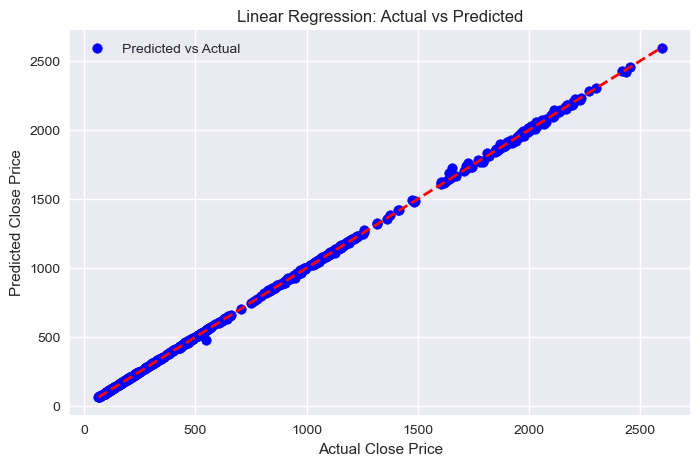

In [12]:
# Linear Regression Model
def train_linear_regression(data):
    # Feature selection
    features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month', 'Daily_Return']
    X = data[features]
    y = data['Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    print("Linear Regression Results:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R-Squared Score:", r2_score(y_test, y_pred))
    
    # Visualize predictions
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Close Price')
    plt.ylabel('Predicted Close Price')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.legend()
    plt.show()
    
    return model

# Train and evaluate Linear Regression
lr_model = train_linear_regression(data)

Moving Average Prediction Results:
Mean Squared Error: 3472.7760507561698
Mean Absolute Error: 43.06777920699239


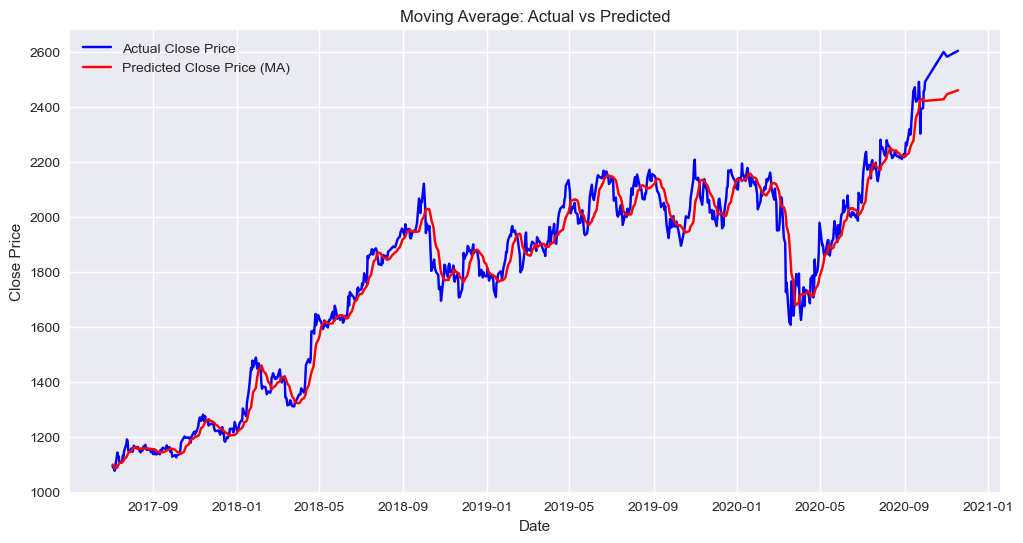

In [13]:
# Simple Moving Average Prediction as a baseline
def moving_average_prediction(data):
    # Use 10-day moving average as a naive predictor
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['Predicted_Close'] = data['MA10'].shift(1)
    
    # Evaluate on test data
    test_data = data.iloc[-int(len(data)*0.2):].copy()
    actual = test_data['Close']
    predicted = test_data['Predicted_Close'].dropna()
    actual = actual[len(actual) - len(predicted):]
    
    # Evaluation
    print("Moving Average Prediction Results:")
    print("Mean Squared Error:", mean_squared_error(actual, predicted))
    print("Mean Absolute Error:", mean_absolute_error(actual, predicted))
    
    # Visualize predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='blue')
    plt.plot(test_data['Date'], test_data['Predicted_Close'], label='Predicted Close Price (MA)', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Moving Average: Actual vs Predicted')
    plt.legend()
    plt.show()

# Run moving average prediction
moving_average_prediction(data)

In [14]:
# Save Linear Regression model
def save_model(model):
    import pickle
    with open('TCS_Linear_Regression.pkl', 'wb') as file:
        pickle.dump(model, file)
    print("Linear Regression model saved successfully!")

# Save model
save_model(lr_model)

Linear Regression model saved successfully!


In [15]:
# Future Work and Interpretation
def future_work():
    print("""
    Future Work:
    1. Explore advanced models like Random Forest or Gradient Boosting.
    2. Add technical indicators like RSI or MACD (requires external libraries).
    3. Incorporate external data like market indices or news sentiment.
    4. Test time-series models like ARIMA for better temporal predictions.
    5. Build a simple dashboard using Excel or Python for visualization.
    
    Interpretation:
    - Linear Regression provides a simple baseline for prediction.
    - Moving Average prediction is a naive approach but useful for trend analysis.
    - Daily Return and lag features capture short-term price movements.
    - High correlation between Open, High, Low, and Close indicates strong linear relationships.
    """)

# Display future work
future_work()


    Future Work:
    1. Explore advanced models like Random Forest or Gradient Boosting.
    2. Add technical indicators like RSI or MACD (requires external libraries).
    3. Incorporate external data like market indices or news sentiment.
    4. Test time-series models like ARIMA for better temporal predictions.
    5. Build a simple dashboard using Excel or Python for visualization.
    
    Interpretation:
    - Linear Regression provides a simple baseline for prediction.
    - Moving Average prediction is a naive approach but useful for trend analysis.
    - Daily Return and lag features capture short-term price movements.
    - High correlation between Open, High, Low, and Close indicates strong linear relationships.
    
